

## Convolutional Neural Networks

---

In this notebook, we train a CNN on augmented images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [11]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 449s 3us/step


### 2. Visualize the First 24 Training Images

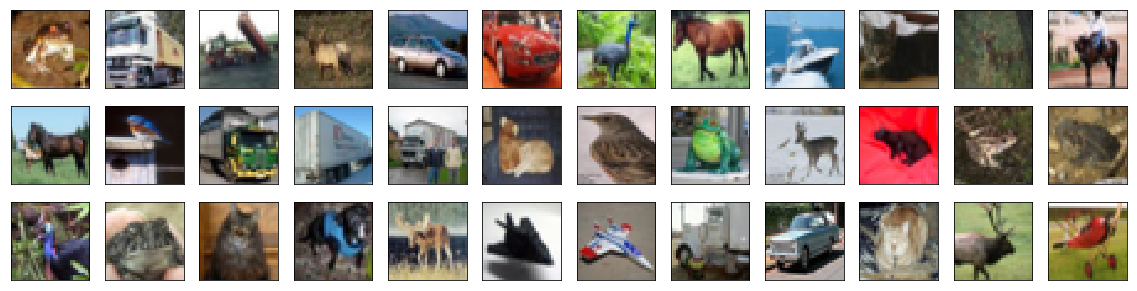

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [13]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255 

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [14]:
from keras.utils import np_utils

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_valid = keras.utils.to_categorical(y_valid, num_classes)

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Create and Configure Augmented Image Generator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True, # randomly flip images horizontally
    rotation_range=20) 

# create and configure augmented image generator
datagen_valid = ImageDataGenerator(
    width_shift_range=0.2,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.2,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True, # randomly flip images horizontally
    rotation_range=20)

# fit augmented image generator on data
datagen_train.fit(x_train)
datagen_valid.fit(x_valid)

### 6. Visualize Original and Augmented Images

<<<<<<< local


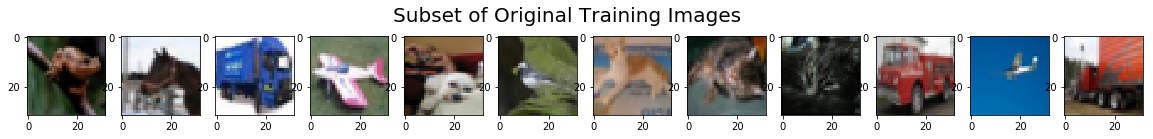

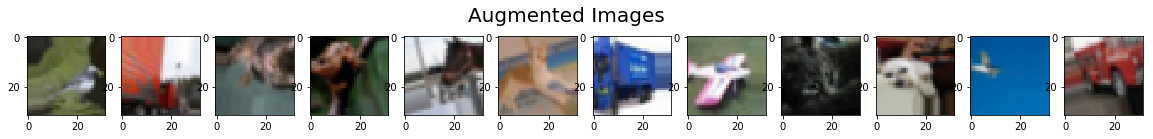

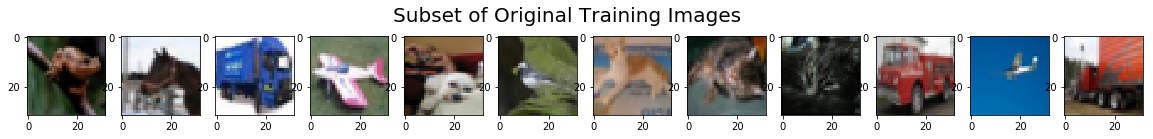

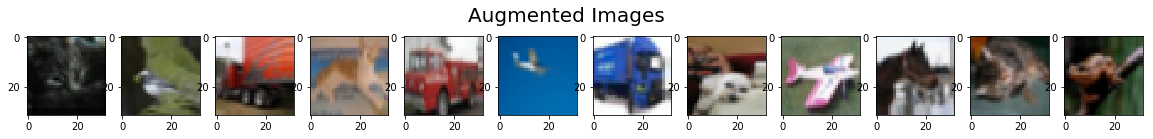

>>>>>>> remote


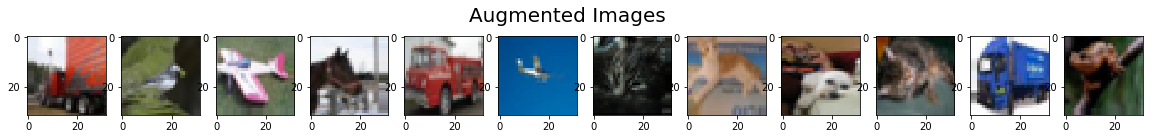

In [44]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagen_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;

### 7. Define the Model Architecture 

In [45]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

model.summary()

<<<<<<< local <modified: >


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 4, 4, 64)          0         
__________

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

>>>>>>> remote <modified: >


### 8. Compile the Model 

In [46]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='nadam', 
                  metrics=['accuracy'])

### 9. Train the Model 

In [ ]:
from keras.callbacks import ModelCheckpoint   

batch_size = 32
epochs = 60

# train the model
checkpointer = ModelCheckpoint(filepath='aug_model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
model.fit_generator(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs, verbose=2, callbacks=[checkpointer],
                    validation_data=datagen_valid.flow(x_valid, y_valid, batch_size=batch_size),
                    validation_steps=x_valid.shape[0] // batch_size)

<<<<<<< local


Epoch 1/60
 - 24s - loss: 1.7637 - acc: 0.3547 - val_loss: 1.5098 - val_acc: 0.4527

Epoch 00001: val_loss improved from inf to 1.50979, saving model to aug_model.weights.best.hdf5
Epoch 2/60
 - 24s - loss: 1.5329 - acc: 0.4424 - val_loss: 1.3853 - val_acc: 0.5074

Epoch 00002: val_loss improved from 1.50979 to 1.38532, saving model to aug_model.weights.best.hdf5
Epoch 3/60
 - 24s - loss: 1.4403 - acc: 0.4817 - val_loss: 1.3075 - val_acc: 0.5326

Epoch 00003: val_loss improved from 1.38532 to 1.30745, saving model to aug_model.weights.best.hdf5
Epoch 4/60
 - 24s - loss: 1.3891 - acc: 0.5029 - val_loss: 1.3700 - val_acc: 0.5095

Epoch 00004: val_loss did not improve from 1.30745
Epoch 5/60
 - 24s - loss: 1.3603 - acc: 0.5186 - val_loss: 1.3201 - val_acc: 0.5495

Epoch 00005: val_loss did not improve from 1.30745
Epoch 6/60
 - 24s - loss: 1.3583 - acc: 0.5197 - val_loss: 1.2408 - val_acc: 0.5622

Epoch 00006: val_loss improved from 1.30745 to 1.24080, saving model to aug_model.weights.be

Epoch 1/100
 - 50s - loss: 1.7075 - acc: 0.3700 - val_loss: 1.4446 - val_acc: 0.4754

Epoch 00001: val_loss improved from inf to 1.44464, saving model to aug_model.weights.best.hdf5
Epoch 2/100
 - 24s - loss: 1.3708 - acc: 0.5042 - val_loss: 1.2105 - val_acc: 0.5775

Epoch 00002: val_loss improved from 1.44464 to 1.21054, saving model to aug_model.weights.best.hdf5
Epoch 3/100
 - 24s - loss: 1.2647 - acc: 0.5481 - val_loss: 1.1809 - val_acc: 0.5900

Epoch 00003: val_loss improved from 1.21054 to 1.18087, saving model to aug_model.weights.best.hdf5
Epoch 4/100
 - 24s - loss: 1.2042 - acc: 0.5695 - val_loss: 1.1264 - val_acc: 0.6079

Epoch 00004: val_loss improved from 1.18087 to 1.12644, saving model to aug_model.weights.best.hdf5
Epoch 5/100
 - 24s - loss: 1.1590 - acc: 0.5876 - val_loss: 1.0336 - val_acc: 0.6435

Epoch 00005: val_loss improved from 1.12644 to 1.03360, saving model to aug_model.weights.best.hdf5
Epoch 6/100
 - 24s - loss: 1.1293 - acc: 0.5981 - val_loss: 1.0318 - val_a

 - 24s - loss: 0.9573 - acc: 0.6725 - val_loss: 0.8852 - val_acc: 0.7087

Epoch 00054: val_loss did not improve from 0.81765
Epoch 55/100
 - 24s - loss: 0.9446 - acc: 0.6763 - val_loss: 0.9127 - val_acc: 0.7031

Epoch 00055: val_loss did not improve from 0.81765
Epoch 56/100
 - 24s - loss: 0.9464 - acc: 0.6743 - val_loss: 0.8993 - val_acc: 0.6963

Epoch 00056: val_loss did not improve from 0.81765
Epoch 57/100
 - 24s - loss: 0.9452 - acc: 0.6739 - val_loss: 0.8305 - val_acc: 0.7262

Epoch 00057: val_loss did not improve from 0.81765
Epoch 58/100
 - 25s - loss: 0.9443 - acc: 0.6757 - val_loss: 0.8673 - val_acc: 0.7021

Epoch 00058: val_loss did not improve from 0.81765
Epoch 59/100
 - 24s - loss: 0.9427 - acc: 0.6751 - val_loss: 0.9123 - val_acc: 0.6936

Epoch 00059: val_loss did not improve from 0.81765
Epoch 60/100
 - 24s - loss: 0.9379 - acc: 0.6783 - val_loss: 0.8487 - val_acc: 0.7180

Epoch 00060: val_loss did not improve from 0.81765
Epoch 61/100
 - 24s - loss: 0.9455 - acc: 0.675

>>>>>>> remote


### 10. Load the Model with the Best Validation Accuracy

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('aug_model.weights.best.hdf5')

### 11. Calculate Classification Accuracy on Test Set

In [ ]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

<<<<<<< local <modified: >



 Test accuracy: 0.6029



 Test accuracy: 0.7257


>>>>>>> remote <modified: >
